<h1>Data Preprocessing</h1>

**Five number summary and Box plot**

In [1]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')

In [2]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df=df[['R&D Spend','Administration','Marketing Spend','Profit']]
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

,R&D Spend,Administration,Marketing Spend,Profit
min,0.00,51283.140,0.0000,14681.4000
25%,39936.37,103730.875,129300.1325,90138.9025
50%,73051.08,122699.795,212716.2400,107978.1900
75%,101602.80,144842.180,299469.0850,139765.9775
max,165349.20,182645.560,471784.1000,192261.8300


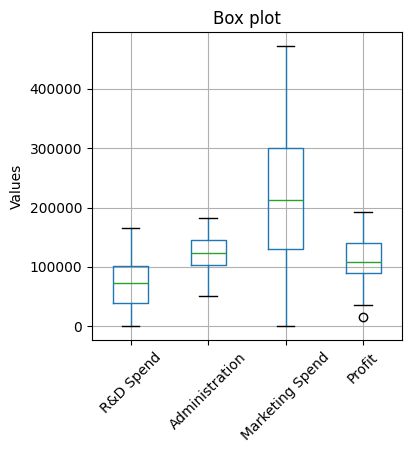

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
df.boxplot()
plt.title('Box plot')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.show()

**Handling missing values**

In [6]:
df=pd.read_csv('Nfl.csv', usecols=range(50), low_memory=False)
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [7]:
missing=df.isnull().sum()
print('Missing values : ',missing.sum())

Missing values :  4806122


In [8]:
import numpy as np
total=df.shape[0]*df.shape[1]
print('Percentage missing : ',missing.sum()/total* 100)

Percentage missing :  26.520412639641105


In [9]:
#drop missing values
df_cleaned=df.dropna()
df_cleaned

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult


In [10]:
numeric=[col for col in df.columns if df[col].dtypes!='O']
categ=[col for col in df.columns if df[col].dtypes=='O']

for col in categ:
    df[col]=df[col].bfill().ffill()

for col in numeric:
    df[col]=df[col].fillna(df[col].mean())
    
missing=df.isnull().sum()
print('Missing values : ',missing.sum())

Missing values :  0


**Covariance and Correlation matrix**

In [11]:
df=pd.read_csv('Salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
print(f"Covariance matrix : \n{df.cov()}\n\nCorrelation matrix : \n{df.corr()}")

Covariance matrix : 
                 YearsExperience        Salary
YearsExperience         8.053609  7.610630e+04
Salary              76106.303448  7.515510e+08

Correlation matrix : 
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000
